In [1]:
import pandas as pd
train_fear_df = pd.read_csv("feartrainalldata.txt","\t")
test_fear_df = pd.read_csv("feartestalldata.txt","\t")

In [2]:
from konlpy.tag import Okt
okt_fear = Okt()
okt_fear.pos(u'전람회 나간다')

[('전람회', 'Noun'), ('나간다', 'Verb')]

In [3]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_fear.pos(doc, norm=True, stem=True)]

In [4]:
train_fear_df.isnull().any()
train_fear_df['document'] = train_fear_df['document'].fillna('');
train_fear_df.isnull().any()
test_fear_df['document'] = test_fear_df['document'].fillna('');

In [5]:
train_fear_docs = [(tokenize(row[1]), row[2]) for row in train_fear_df.values]
test_fear_docs = [(tokenize(row[1]),row[2]) for row in test_fear_df.values]

In [6]:
print(train_fear_docs[0])
print(test_fear_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 1)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 1)


In [7]:
tokens = [t for d in train_fear_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [8]:
import nltk
fear_text = nltk.Text(tokens, name='NMSC')
print(len(fear_text.tokens))
print(len(set(fear_text.tokens)))
print(fear_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46308 missing from c

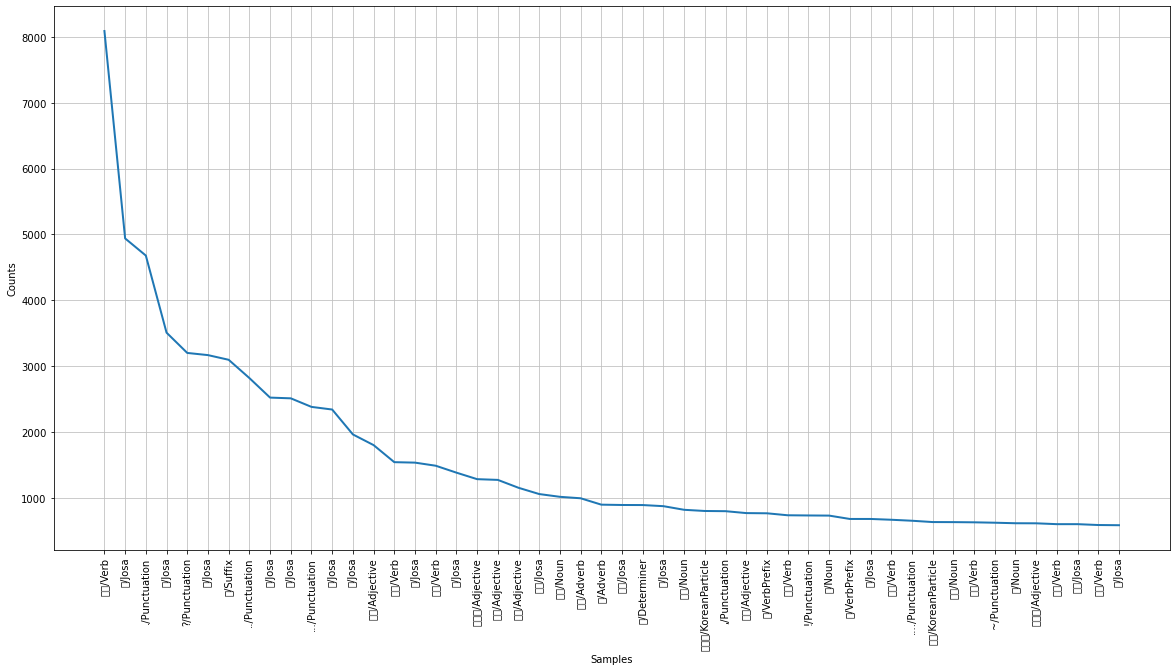

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
fear_text.plot(50)

In [10]:
FEAR_FREQUENCY_COUNT = 3000;
fear_selected_words = [f[0] for f in fear_text.vocab().most_common(FEAR_FREQUENCY_COUNT)]

In [11]:
def fear_term_frequency(doc):
    return [doc.count(word) for word in fear_selected_words]

In [12]:
x_fear_train = [fear_term_frequency(d) for d,_ in train_fear_docs]
x_fear_test = [fear_term_frequency(d) for d,_ in test_fear_docs]
y_fear_train = [c for _,c in train_fear_docs]
y_fear_test = [c for _,c in test_fear_docs]

In [13]:
import numpy as np
x_fear_train = np.asarray(x_fear_train).astype('float32')
x_fear_test = np.asarray(x_fear_test). astype('float32')

y_fear_train = np.asarray(y_fear_train).astype('float32')
y_fear_test = np.asarray(y_fear_test).astype('float32')

In [14]:
import tensorflow as tf
fear_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(FEAR_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [15]:
fear_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [171]:
fear_model.fit(x_fear_train, y_fear_train, epochs=500, batch_size=512)

Epoch 1/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0040 - binary_accuracy: 0.9981
Epoch 2/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0038 - binary_accuracy: 0.9983
Epoch 3/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0040 - binary_accuracy: 0.9980
Epoch 4/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0037 - binary_accuracy: 0.9983
Epoch 5/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0037 - binary_accuracy: 0.9982
Epoch 6/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0038 - binary_accuracy: 0.9983
Epoch 7/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0041 - binary_accuracy: 0.9982
Epoch 8/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0037 - binary_accuracy: 0.9984
Epoch 9/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0035 - binary_accuracy: 0.9982
Epoch 10/500
53/53 [==========================

53/53 [==============================] - 0s 7ms/step - loss: 0.0027 - binary_accuracy: 0.9984
Epoch 78/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0027 - binary_accuracy: 0.9984
Epoch 79/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0028 - binary_accuracy: 0.9984
Epoch 80/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0027 - binary_accuracy: 0.9986
Epoch 81/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0028 - binary_accuracy: 0.9985
Epoch 82/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0028 - binary_accuracy: 0.9984
Epoch 83/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0028 - binary_accuracy: 0.9983
Epoch 84/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0027 - binary_accuracy: 0.9983
Epoch 85/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0027 - binary_accuracy: 0.9984
Epoch 86/500
53/53 [==============================

53/53 [==============================] - 0s 8ms/step - loss: 0.0026 - binary_accuracy: 0.9984
Epoch 154/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0025 - binary_accuracy: 0.9984
Epoch 155/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0026 - binary_accuracy: 0.9984
Epoch 156/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9986
Epoch 157/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9983
Epoch 158/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0026 - binary_accuracy: 0.9985
Epoch 159/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0025 - binary_accuracy: 0.9985
Epoch 160/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0026 - binary_accuracy: 0.9984
Epoch 161/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0026 - binary_accuracy: 0.9985
Epoch 162/500
53/53 [=====================

Epoch 229/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9986
Epoch 230/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0025 - binary_accuracy: 0.9985
Epoch 231/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0026 - binary_accuracy: 0.9984
Epoch 232/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 233/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0025 - binary_accuracy: 0.9985
Epoch 234/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 235/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9985
Epoch 236/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9985
Epoch 237/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9984
Epoch 238/500
53/53 [=======

53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9986
Epoch 305/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 306/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9985
Epoch 307/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 308/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0025 - binary_accuracy: 0.9984
Epoch 309/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 310/500
53/53 [==============================] - 1s 11ms/step - loss: 0.0026 - binary_accuracy: 0.9986
Epoch 311/500
53/53 [==============================] - 1s 10ms/step - loss: 0.0027 - binary_accuracy: 0.9986
Epoch 312/500
53/53 [==============================] - 1s 10ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 313/500
53/53 [==================

53/53 [==============================] - 0s 8ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 380/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9985
Epoch 381/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0026 - binary_accuracy: 0.9986
Epoch 382/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 383/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 384/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9985
Epoch 385/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 386/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 387/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9985
Epoch 388/500
53/53 [=====================

Epoch 455/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 456/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0025 - binary_accuracy: 0.9985
Epoch 457/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 458/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0026 - binary_accuracy: 0.9987
Epoch 459/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9986
Epoch 460/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9985
Epoch 461/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0027 - binary_accuracy: 0.9985
Epoch 462/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 463/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9986
Epoch 464/500
53/53 [=======

In [172]:
fear_results = fear_model.evaluate(x_fear_test, y_fear_test)

362/362 [==============================] - 0s 1ms/step - loss: 4.4869 - binary_accuracy: 0.8382


In [173]:
fear_results

[4.486941814422607, 0.8382136821746826]

In [174]:
fear_model.save('fear_model.h5')

In [175]:
fear_review = "너무 무섭다"
fear_token = tokenize(fear_review)
fear_token

['너무/Adverb', '무섭다/Adjective']

In [176]:
tf = fear_term_frequency(fear_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(fear_model.predict(data))

1.0

In [177]:
def fear_predict(predict):
    fear_token = tokenize(predict)
    fear_tfq = fear_term_frequency(fear_token)
    fear_data = np.expand_dims(np.asarray(fear_tfq).astype('float32'), axis=0)
    fear_score = float(fear_model.predict(fear_data))
    print(f"공포 ({round(fear_score*100)}%)")
    fear = round(fear_score*100)

In [178]:
fear_predict("")

공포 (16%)


In [24]:
#놀람 감정 분석

In [25]:
import pandas as pd
train_surprise_df = pd.read_csv("surprisetrainalldata.txt","\t")
test_surprise_df = pd.read_csv("surprisetestalldata.txt","\t")

In [26]:
from konlpy.tag import Okt
okt_surprise = Okt()

In [27]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_surprise.pos(doc, norm=True, stem=True)]

In [28]:
train_surprise_df.isnull().any()
train_surprise_df['document'] = train_surprise_df['document'].fillna('');
train_surprise_df.isnull().any()
test_surprise_df['document'] = test_surprise_df['document'].fillna('');

In [29]:
train_surprise_docs = [(tokenize(row[1]), row[2]) for row in train_surprise_df.values]
test_surprise_docs = [(tokenize(row[1]),row[2]) for row in test_surprise_df.values]

In [30]:
print(train_surprise_docs[0])
print(test_surprise_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [31]:
tokens = [t for d in train_surprise_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [32]:
import nltk
surprise_text = nltk.Text(tokens, name='NMSC')
print(len(surprise_text.tokens))
print(len(set(surprise_text.tokens)))
print(surprise_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


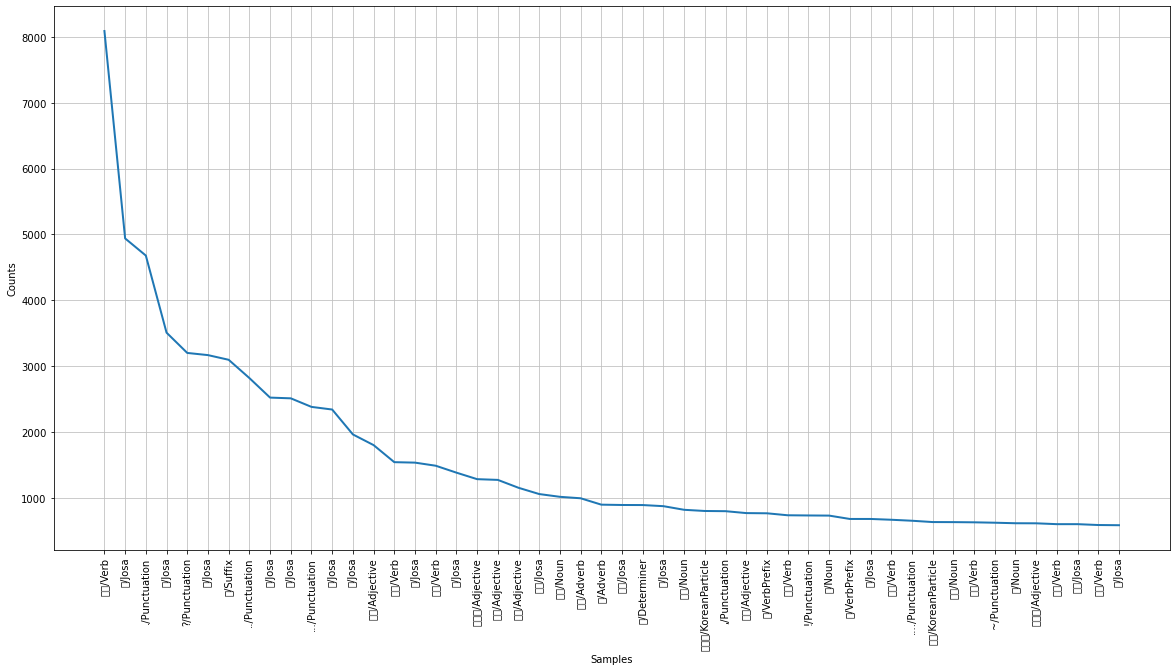

In [33]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
surprise_text.plot(50)

In [34]:
SURPRISE_FREQUENCY_COUNT = 3000;
surprise_selected_words = [f[0] for f in surprise_text.vocab().most_common(SURPRISE_FREQUENCY_COUNT)]

In [35]:
def surprise_term_frequency(doc):
    return [doc.count(word) for word in surprise_selected_words]

In [36]:
x_surprise_train = [surprise_term_frequency(d) for d,_ in train_surprise_docs]
x_surprise_test = [surprise_term_frequency(d) for d,_ in test_surprise_docs]
y_surprise_train = [c for _,c in train_surprise_docs]
y_surprise_test = [c for _,c in test_surprise_docs]

In [37]:
import numpy as np
x_surprise_train = np.asarray(x_surprise_train).astype('float32')
x_surprise_test = np.asarray(x_surprise_test). astype('float32')

y_surprise_train = np.asarray(y_surprise_train).astype('float32')
y_surprise_test = np.asarray(y_surprise_test).astype('float32')

In [38]:
import tensorflow as tf
surprise_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SURPRISE_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [39]:
surprise_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [179]:
surprise_model.fit(x_surprise_train, y_surprise_train, epochs=500, batch_size=512)

Epoch 1/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0047 - binary_accuracy: 0.9978
Epoch 2/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0047 - binary_accuracy: 0.9978
Epoch 3/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0048 - binary_accuracy: 0.9978
Epoch 4/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0045 - binary_accuracy: 0.9979
Epoch 5/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0045 - binary_accuracy: 0.9978
Epoch 6/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0046 - binary_accuracy: 0.9980
Epoch 7/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0044 - binary_accuracy: 0.9980
Epoch 8/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0045 - binary_accuracy: 0.9980
Epoch 9/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0044 - binary_accuracy: 0.9978
Epoch 10/500
53/53 [==========================

53/53 [==============================] - 0s 8ms/step - loss: 0.0032 - binary_accuracy: 0.9982
Epoch 78/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0034 - binary_accuracy: 0.9981
Epoch 79/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0033 - binary_accuracy: 0.9982
Epoch 80/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0033 - binary_accuracy: 0.9980
Epoch 81/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0033 - binary_accuracy: 0.9980
Epoch 82/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0032 - binary_accuracy: 0.9981
Epoch 83/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0033 - binary_accuracy: 0.9982
Epoch 84/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0034 - binary_accuracy: 0.9980
Epoch 85/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0032 - binary_accuracy: 0.9980
Epoch 86/500
53/53 [==============================

53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9982
Epoch 154/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9981
Epoch 155/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9981
Epoch 156/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9981
Epoch 157/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9980
Epoch 158/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9982
Epoch 159/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9981
Epoch 160/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9982
Epoch 161/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9981
Epoch 162/500
53/53 [=====================

Epoch 229/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9982
Epoch 230/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9982
Epoch 231/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9981
Epoch 232/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0029 - binary_accuracy: 0.9983
Epoch 233/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 234/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9984
Epoch 235/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9982
Epoch 236/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0031 - binary_accuracy: 0.9981
Epoch 237/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9982
Epoch 238/500
53/53 [=======

53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 305/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 306/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 307/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 308/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 309/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 310/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9982
Epoch 311/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 312/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9982
Epoch 313/500
53/53 [=====================

Epoch 380/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0029 - binary_accuracy: 0.9983
Epoch 381/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9984
Epoch 382/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 383/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 384/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 385/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 386/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9984
Epoch 387/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 388/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 389/500
53/53 [=======

53/53 [==============================] - 0s 8ms/step - loss: 0.0029 - binary_accuracy: 0.9983
Epoch 456/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9982
Epoch 457/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9984
Epoch 458/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 459/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 460/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 461/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9982
Epoch 462/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 463/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9983
Epoch 464/500
53/53 [=====================

In [180]:
surprise_results = surprise_model.evaluate(x_surprise_test, y_surprise_test)

362/362 [==============================] - 0s 1ms/step - loss: 5.6838 - binary_accuracy: 0.8135


In [181]:
surprise_results

[5.683849811553955, 0.8135095238685608]

In [182]:
surprise_model.save('surprise_model.h5')

In [183]:
surprise_review = "너무 놀랍다"
surprise_token = tokenize(surprise_review)
surprise_token

['너무/Adverb', '놀라다/Verb']

In [184]:
tf = surprise_term_frequency(surprise_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(surprise_model.predict(data))

1.0

In [185]:
def surprise_predict(predict):
    surprise_token = tokenize(predict)
    surprise_tfq = surprise_term_frequency(surprise_token)
    surprise_data = np.expand_dims(np.asarray(surprise_tfq).astype('float32'), axis=0)
    surprise_score = float(surprise_model.predict(surprise_data))
    print(f"놀람 ({round(surprise_score*100)}%)")
    surprise = round(surprise_score*100)

In [186]:
surprise_predict("원재상")

놀람 (35%)


In [48]:
#분노 감정 분석

In [49]:
import pandas as pd
train_anger_df = pd.read_csv("angertrainalldata.txt","\t")
test_anger_df = pd.read_csv("angertestalldata.txt","\t")

In [50]:
from konlpy.tag import Okt
okt_anger = Okt()

In [51]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_anger.pos(doc, norm=True, stem=True)]

In [52]:
train_anger_df.isnull().any()
train_anger_df['document'] = train_anger_df['document'].fillna('');
train_anger_df.isnull().any()
test_anger_df['document'] = test_anger_df['document'].fillna('');

In [53]:
train_anger_docs = [(tokenize(row[1]), row[2]) for row in train_anger_df.values]
test_anger_docs = [(tokenize(row[1]),row[2]) for row in test_anger_df.values]

In [54]:
print(train_anger_docs[0])
print(test_anger_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [55]:
tokens = [t for d in train_anger_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [56]:
import nltk
anger_text = nltk.Text(tokens, name='NMSC')
print(len(anger_text.tokens))
print(len(set(anger_text.tokens)))
print(anger_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


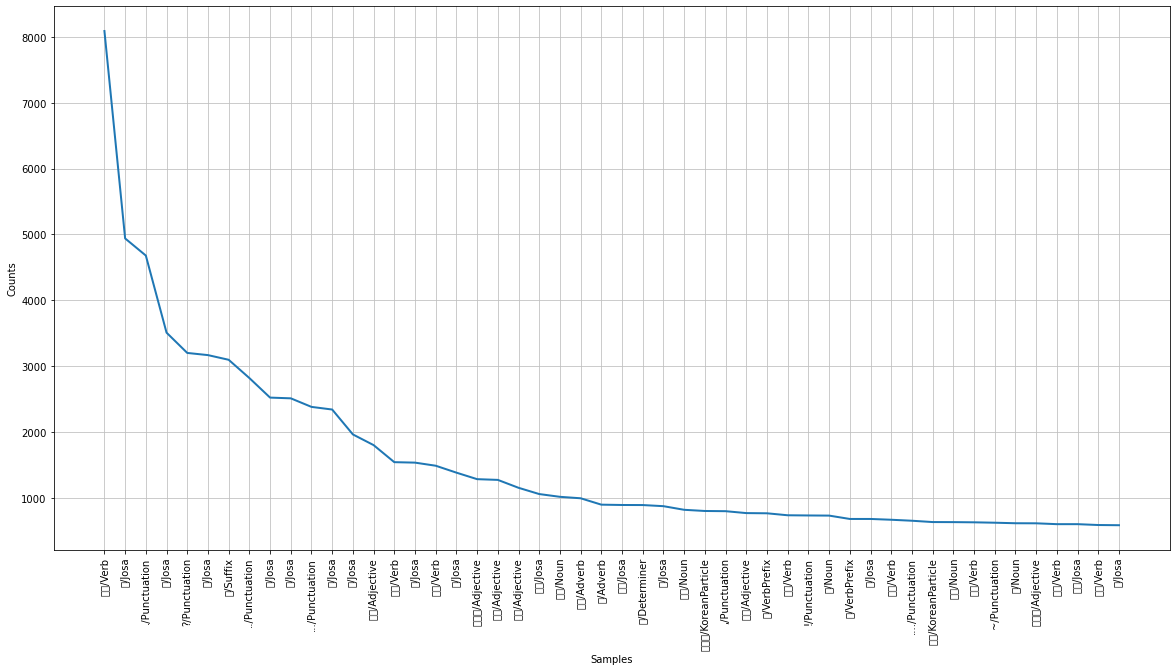

In [57]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
anger_text.plot(50)

In [58]:
ANGER_FREQUENCY_COUNT = 3000;
anger_selected_words = [f[0] for f in anger_text.vocab().most_common(ANGER_FREQUENCY_COUNT)]

In [59]:
def anger_term_frequency(doc):
    return [doc.count(word) for word in anger_selected_words]

In [60]:
x_anger_train = [anger_term_frequency(d) for d,_ in train_anger_docs]
x_anger_test = [anger_term_frequency(d) for d,_ in test_anger_docs]
y_anger_train = [c for _,c in train_anger_docs]
y_anger_test = [c for _,c in test_anger_docs]

In [61]:
import numpy as np
x_anger_train = np.asarray(x_anger_train).astype('float32')
x_anger_test = np.asarray(x_anger_test). astype('float32')

y_anger_train = np.asarray(y_anger_train).astype('float32')
y_anger_test = np.asarray(y_anger_test).astype('float32')

In [62]:
import tensorflow as tf
anger_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(ANGER_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [63]:
anger_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [187]:
anger_model.fit(x_anger_train, y_anger_train, epochs=500, batch_size=512)

Epoch 1/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 2/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0020 - binary_accuracy: 0.9991
Epoch 3/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0019 - binary_accuracy: 0.9992
Epoch 4/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0019 - binary_accuracy: 0.9991
Epoch 5/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0019 - binary_accuracy: 0.9992
Epoch 6/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0019 - binary_accuracy: 0.9992
Epoch 7/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0019 - binary_accuracy: 0.9992
Epoch 8/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0019 - binary_accuracy: 0.9991
Epoch 9/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0019 - binary_accuracy: 0.9992
Epoch 10/500
53/53 [==========================

53/53 [==============================] - 0s 8ms/step - loss: 0.0016 - binary_accuracy: 0.9993
Epoch 78/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0015 - binary_accuracy: 0.9992
Epoch 79/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0015 - binary_accuracy: 0.9992
Epoch 80/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0015 - binary_accuracy: 0.9992
Epoch 81/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0015 - binary_accuracy: 0.9991
Epoch 82/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0015 - binary_accuracy: 0.9993
Epoch 83/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0015 - binary_accuracy: 0.9993
Epoch 84/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0015 - binary_accuracy: 0.9992
Epoch 85/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0016 - binary_accuracy: 0.9993
Epoch 86/500
53/53 [==============================

53/53 [==============================] - 1s 11ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 154/500
53/53 [==============================] - 1s 12ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 155/500
53/53 [==============================] - 1s 12ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 156/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 157/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 158/500
53/53 [==============================] - 1s 10ms/step - loss: 0.0014 - binary_accuracy: 0.9991
Epoch 159/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0014 - binary_accuracy: 0.9991
Epoch 160/500
53/53 [==============================] - 1s 9ms/step - loss: 0.0014 - binary_accuracy: 0.9992
Epoch 161/500
53/53 [==============================] - 1s 11ms/step - loss: 0.0014 - binary_accuracy: 0.9992
Epoch 162/500
53/53 [================

53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 229/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9992
Epoch 230/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9994
Epoch 231/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 232/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 233/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9992
Epoch 234/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9991
Epoch 235/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0014 - binary_accuracy: 0.9992
Epoch 236/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9992
Epoch 237/500
53/53 [=====================

53/53 [==============================] - 0s 8ms/step - loss: 0.0015 - binary_accuracy: 0.9993
Epoch 304/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 305/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9992
Epoch 306/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 307/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 308/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 309/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 310/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 311/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0014 - binary_accuracy: 0.9991
Epoch 312/500
53/53 [=====================

53/53 [==============================] - 0s 8ms/step - loss: 0.0013 - binary_accuracy: 0.9992
Epoch 379/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 380/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0014 - binary_accuracy: 0.9992
Epoch 381/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 382/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 383/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 384/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 385/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9994
Epoch 386/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9994
Epoch 387/500
53/53 [=====================

53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 454/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 455/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 456/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 457/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9994
Epoch 458/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 459/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 460/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 461/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 462/500
53/53 [=====================

In [188]:
anger_results = anger_model.evaluate(x_anger_test, y_anger_test)

362/362 [==============================] - 0s 954us/step - loss: 4.4906 - binary_accuracy: 0.8215


In [189]:
anger_results

[4.490624904632568, 0.8214563131332397]

In [190]:
anger_model.save('anger_model.h5')

In [191]:
anger_review = "너무 화난다"
anger_token = tokenize(anger_review)
anger_token

['너무/Adverb', '화나다/Verb']

In [192]:
tf = anger_term_frequency(anger_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(anger_model.predict(data))

0.9998780488967896

In [193]:
def anger_predict(predict):
    anger_token = tokenize(predict)
    anger_tfq = anger_term_frequency(anger_token)
    anger_data = np.expand_dims(np.asarray(anger_tfq).astype('float32'), axis=0)
    anger_score = float(anger_model.predict(anger_data))
    print(f"분노 ({round(anger_score*100)}%)")
    anger = round(anger_score*100)

In [194]:
anger_predict("분노")

분노 (100%)


In [72]:
#슬픔 감정 분석

In [73]:
import pandas as pd
train_sadness_df = pd.read_csv("sadnesstrainalldata.txt","\t")
test_sadness_df = pd.read_csv("sadnesstestalldata.txt","\t")

In [74]:
from konlpy.tag import Okt
okt_sadness = Okt()

In [75]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_sadness.pos(doc, norm=True, stem=True)]

In [76]:
train_sadness_df.isnull().any()
train_sadness_df['document'] = train_sadness_df['document'].fillna('');
train_sadness_df.isnull().any()
test_sadness_df['document'] = test_sadness_df['document'].fillna('');

In [77]:
train_sadness_docs = [(tokenize(row[1]), row[2]) for row in train_sadness_df.values]
test_sadness_docs = [(tokenize(row[1]),row[2]) for row in test_sadness_df.values]

In [78]:
print(train_sadness_docs[0])
print(test_sadness_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [79]:
tokens = [t for d in train_sadness_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [80]:
import nltk
sadness_text = nltk.Text(tokens, name='NMSC')
print(len(sadness_text.tokens))
print(len(set(sadness_text.tokens)))
print(sadness_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


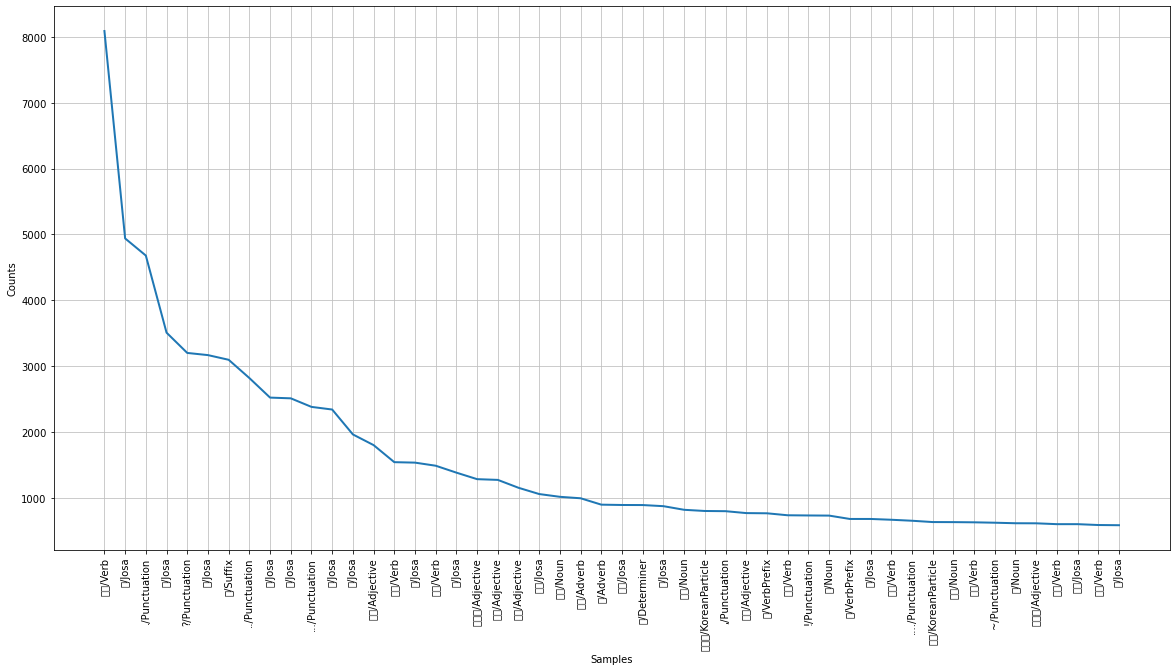

In [81]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
sadness_text.plot(50)

In [82]:
SADNESS_FREQUENCY_COUNT = 3000;
sadness_selected_words = [f[0] for f in fear_text.vocab().most_common(SADNESS_FREQUENCY_COUNT)]

In [83]:
def sadness_term_frequency(doc):
    return [doc.count(word) for word in sadness_selected_words]

In [84]:
x_sadness_train = [sadness_term_frequency(d) for d,_ in train_sadness_docs]
x_sadness_test = [sadness_term_frequency(d) for d,_ in test_sadness_docs]
y_sadness_train = [c for _,c in train_sadness_docs]
y_sadness_test = [c for _,c in test_sadness_docs]

In [85]:
import numpy as np
x_sadness_train = np.asarray(x_sadness_train).astype('float32')
x_sadness_test = np.asarray(x_sadness_test). astype('float32')

y_sadness_train = np.asarray(y_sadness_train).astype('float32')
y_sadness_test = np.asarray(y_sadness_test).astype('float32')

In [86]:
import tensorflow as tf
sadness_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SADNESS_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [87]:
sadness_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [195]:
sadness_model.fit(x_sadness_train, y_sadness_train, epochs=500, batch_size=512)

Epoch 1/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0031 - binary_accuracy: 0.9985
Epoch 2/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0030 - binary_accuracy: 0.9987
Epoch 3/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0031 - binary_accuracy: 0.9986
Epoch 4/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9987
Epoch 5/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0030 - binary_accuracy: 0.9987
Epoch 6/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0029 - binary_accuracy: 0.9988
Epoch 7/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9985
Epoch 8/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9985
Epoch 9/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0028 - binary_accuracy: 0.9987
Epoch 10/500
53/53 [==========================

53/53 [==============================] - 0s 7ms/step - loss: 0.0023 - binary_accuracy: 0.9989
Epoch 78/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0023 - binary_accuracy: 0.9988
Epoch 79/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0023 - binary_accuracy: 0.9987
Epoch 80/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 81/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0022 - binary_accuracy: 0.9988
Epoch 82/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9987
Epoch 83/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9988
Epoch 84/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9988
Epoch 85/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0023 - binary_accuracy: 0.9989
Epoch 86/500
53/53 [==============================

53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 154/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 155/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 156/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 157/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9990
Epoch 158/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 159/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 160/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9989
Epoch 161/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 162/500
53/53 [=====================

53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9990
Epoch 229/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 230/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9989
Epoch 231/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 232/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 233/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 234/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 235/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9990
Epoch 236/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 237/500
53/53 [=====================

Epoch 304/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 305/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 306/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 307/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9990
Epoch 308/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9990
Epoch 309/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 310/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 311/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 312/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 313/500
53/53 [=======

53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9989
Epoch 380/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9990
Epoch 381/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 382/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9990
Epoch 383/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 384/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9990
Epoch 385/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9989
Epoch 386/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 387/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 388/500
53/53 [=====================

Epoch 455/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 456/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 457/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9990
Epoch 458/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 459/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 460/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 461/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 462/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 0.9989
Epoch 463/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0021 - binary_accuracy: 0.9990
Epoch 464/500
53/53 [=======

In [196]:
sadness_results = sadness_model.evaluate(x_sadness_test, y_sadness_test)

362/362 [==============================] - 0s 1ms/step - loss: 4.5136 - binary_accuracy: 0.8633


In [197]:
sadness_results

[4.513577461242676, 0.8633497357368469]

In [198]:
sadness_model.save('sadness_model.h5')

In [199]:
sadness_review = "너무 화난다"
sadness_token = tokenize(sadness_review)
sadness_token

['너무/Adverb', '화나다/Verb']

In [200]:
tf = sadness_term_frequency(sadness_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(sadness_model.predict(data))

6.472694602521756e-10

In [201]:
def sadness_predict(predict):
    sadness_token = tokenize(predict)
    sadness_tfq = sadness_term_frequency(sadness_token)
    sadness_data = np.expand_dims(np.asarray(sadness_tfq).astype('float32'), axis=0)
    sadness_score = float(sadness_model.predict(sadness_data))
    print(f"슬픔 ({round(sadness_score*100)}%)")
    sadness = round(sadness_score*100)

In [202]:
sadness_predict(".")

슬픔 (0%)


In [96]:
#중립 감정 분석

In [97]:
import pandas as pd
train_neutral_df = pd.read_csv("neutraltrainalldata.txt","\t")
test_neutral_df = pd.read_csv("neutraltestalldata.txt","\t")

In [98]:
from konlpy.tag import Okt
okt_neutral = Okt()

In [99]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_neutral.pos(doc, norm=True, stem=True)]

In [100]:
train_neutral_docs = [(tokenize(row[1]), row[2]) for row in train_neutral_df.values]
test_neutral_docs = [(tokenize(row[1]),row[2]) for row in test_neutral_df.values]

In [101]:
print(train_neutral_docs[0])
print(test_neutral_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [102]:
tokens = [t for d in train_neutral_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [103]:
import nltk
neutral_text = nltk.Text(tokens, name='NMSC')
print(len(neutral_text.tokens))
print(len(set(neutral_text.tokens)))
print(neutral_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


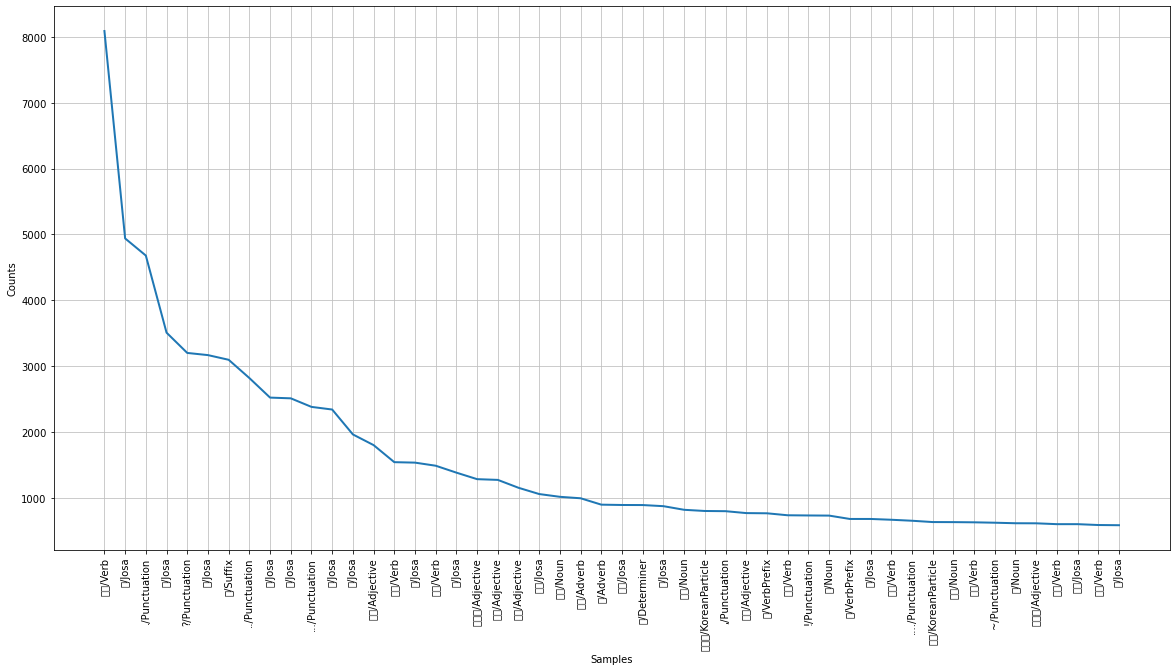

In [104]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
neutral_text.plot(50)

In [105]:
NEUTRAL_FREQUENCY_COUNT = 3000;
neutral_selected_words = [f[0] for f in neutral_text.vocab().most_common(NEUTRAL_FREQUENCY_COUNT)]

In [106]:
def neutral_term_frequency(doc):
    return [doc.count(word) for word in neutral_selected_words]

In [107]:
x_neutral_train = [neutral_term_frequency(d) for d,_ in train_neutral_docs]
x_neutral_test = [neutral_term_frequency(d) for d,_ in test_neutral_docs]
y_neutral_train = [c for _,c in train_neutral_docs]
y_neutral_test = [c for _,c in test_neutral_docs]

In [108]:
import numpy as np
x_neutral_train = np.asarray(x_neutral_train).astype('float32')
x_neutral_test = np.asarray(x_neutral_test). astype('float32')

y_neutral_train = np.asarray(y_neutral_train).astype('float32')
y_neutral_test = np.asarray(y_neutral_test).astype('float32')

In [109]:
import tensorflow as tf
neutral_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(NEUTRAL_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [110]:
neutral_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [203]:
neutral_model.fit(x_neutral_train, y_neutral_train, epochs=500, batch_size=512)

Epoch 1/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0032 - binary_accuracy: 0.9989
Epoch 2/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0028 - binary_accuracy: 0.9989
Epoch 3/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0029 - binary_accuracy: 0.9988
Epoch 4/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0031 - binary_accuracy: 0.9989
Epoch 5/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9988
Epoch 6/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0030 - binary_accuracy: 0.9988
Epoch 7/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0027 - binary_accuracy: 0.9989
Epoch 8/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0027 - binary_accuracy: 0.9989
Epoch 9/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9989
Epoch 10/500
53/53 [==========================

53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9989
Epoch 78/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0022 - binary_accuracy: 0.9990
Epoch 79/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9989
Epoch 80/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9989
Epoch 81/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9989
Epoch 82/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0021 - binary_accuracy: 0.9989
Epoch 83/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9989
Epoch 84/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9988
Epoch 85/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 0.9990
Epoch 86/500
53/53 [==============================

53/53 [==============================] - 0s 7ms/step - loss: 0.0020 - binary_accuracy: 0.9989
Epoch 153/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 0.9990
Epoch 154/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0020 - binary_accuracy: 0.9989
Epoch 155/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 0.9989
Epoch 156/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 0.9990
Epoch 157/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0020 - binary_accuracy: 0.9990
Epoch 158/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0021 - binary_accuracy: 0.9990
Epoch 159/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0020 - binary_accuracy: 0.9989
Epoch 160/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 161/500
53/53 [=====================

Epoch 228/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 229/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 230/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0020 - binary_accuracy: 0.9990
Epoch 231/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 232/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0020 - binary_accuracy: 0.9990
Epoch 233/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 234/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 235/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 0.9989
Epoch 236/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 237/500
53/53 [=======

53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 0.9990
Epoch 304/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 305/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 306/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 307/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 308/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 309/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 0.9990
Epoch 310/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 311/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 312/500
53/53 [=====================

Epoch 379/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9991
Epoch 380/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 381/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 382/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 383/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 384/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 385/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 386/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0020 - binary_accuracy: 0.9990
Epoch 387/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 388/500
53/53 [=======

53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 455/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9991
Epoch 456/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 457/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 458/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 459/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 460/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 461/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 462/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 463/500
53/53 [=====================

In [204]:
neutral_results = neutral_model.evaluate(x_neutral_test, y_neutral_test)

362/362 [==============================] - 0s 1ms/step - loss: 5.7339 - binary_accuracy: 0.8012


In [205]:
neutral_results

[5.73386812210083, 0.8012438416481018]

In [206]:
neutral_model.save('neutral_model.h5')

In [207]:
neutral_review = "너무 화난다"
neutral_token = tokenize(neutral_review)
neutral_token

['너무/Adverb', '화나다/Verb']

In [208]:
tf = neutral_term_frequency(neutral_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(neutral_model.predict(data))

9.351050067607503e-08

In [209]:
def neutral_predict(predict):
    neutral_token = tokenize(predict)
    neutral_tfq = neutral_term_frequency(neutral_token)
    neutral_data = np.expand_dims(np.asarray(neutral_tfq).astype('float32'), axis=0)
    neutral_score = float(neutral_model.predict(neutral_data))
    print(f"중립 ({round(neutral_score*100)}%)")
    neutral = round(neutral_score*100)

In [210]:
neutral_predict("안녕")

중립 (26%)


In [211]:
#행복 감정 분석

In [120]:
import pandas as pd
train_happy_df = pd.read_csv("happytrainalldata.txt","\t")
test_happy_df = pd.read_csv("happytestalldata.txt","\t")

In [121]:
from konlpy.tag import Okt
okt_happy = Okt()

In [122]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_happy.pos(doc, norm=True, stem=True)]

In [123]:
train_happy_docs = [(tokenize(row[1]), row[2]) for row in train_happy_df.values]
test_happy_docs = [(tokenize(row[1]),row[2]) for row in test_happy_df.values]

In [124]:
print(train_happy_docs[0])
print(test_happy_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [125]:
tokens = [t for d in train_happy_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [126]:
import nltk
happy_text = nltk.Text(tokens, name='NMSC')
print(len(happy_text.tokens))
print(len(set(happy_text.tokens)))
print(happy_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


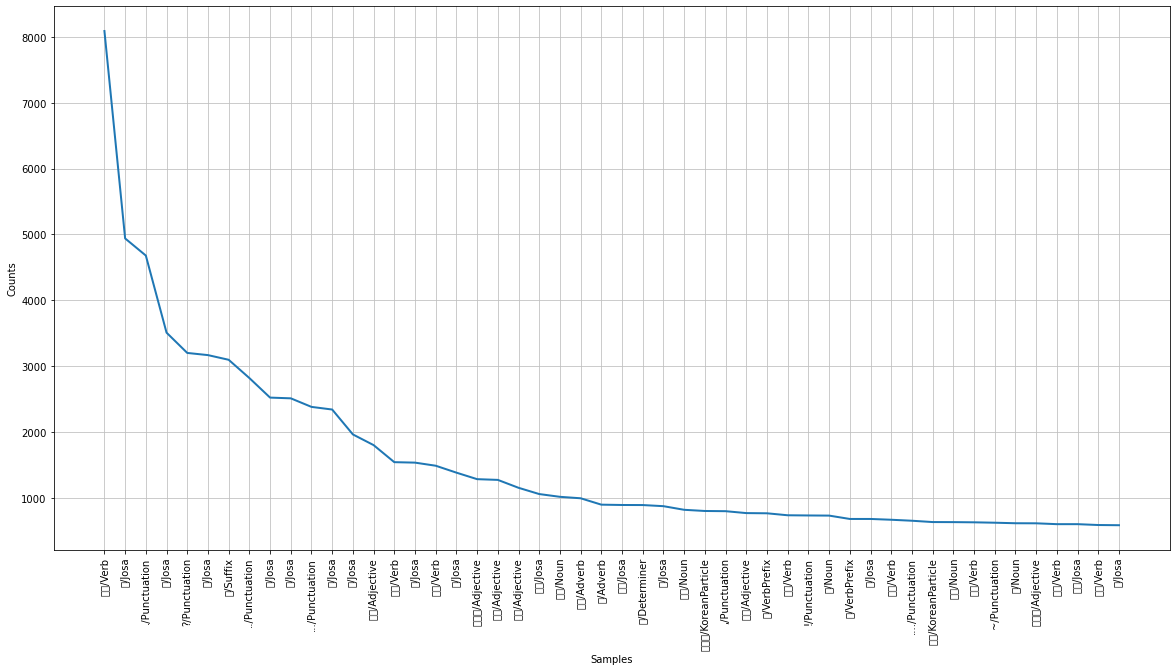

In [127]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
happy_text.plot(50)

In [128]:
HAPPY_FREQUENCY_COUNT = 3000;
happy_selected_words = [f[0] for f in happy_text.vocab().most_common(HAPPY_FREQUENCY_COUNT)]

In [129]:
def happy_term_frequency(doc):
    return [doc.count(word) for word in happy_selected_words]

In [130]:
x_happy_train = [happy_term_frequency(d) for d,_ in train_happy_docs]
x_happy_test = [happy_term_frequency(d) for d,_ in test_happy_docs]
y_happy_train = [c for _,c in train_happy_docs]
y_happy_test = [c for _,c in test_happy_docs]

In [131]:
import numpy as np
x_happy_train = np.asarray(x_happy_train).astype('float32')
x_happy_test = np.asarray(x_happy_test). astype('float32')

y_happy_train = np.asarray(y_happy_train).astype('float32')
y_happy_test = np.asarray(y_happy_test).astype('float32')

In [132]:
import tensorflow as tf
happy_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(HAPPY_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [133]:
happy_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [212]:
happy_model.fit(x_happy_train, y_happy_train, epochs=500, batch_size=512)

Epoch 1/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9988
Epoch 2/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0028 - binary_accuracy: 0.9988
Epoch 3/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0026 - binary_accuracy: 0.9987
Epoch 4/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9986
Epoch 5/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 0.9987
Epoch 6/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9988
Epoch 7/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9988
Epoch 8/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0025 - binary_accuracy: 0.9988
Epoch 9/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0024 - binary_accuracy: 0.9988
Epoch 10/500
53/53 [==========================

53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 78/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 79/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 80/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9989
Epoch 81/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 82/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9989
Epoch 83/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0020 - binary_accuracy: 0.9989
Epoch 84/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 85/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 86/500
53/53 [==============================

53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 154/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 155/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 156/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 157/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 158/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 159/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9989
Epoch 160/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 161/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 0.9990
Epoch 162/500
53/53 [=====================

53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 229/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 230/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 231/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 232/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 233/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 234/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 235/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 236/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 237/500
53/53 [=====================

Epoch 304/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 305/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 306/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 307/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 308/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 309/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 310/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 311/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 312/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9991
Epoch 313/500
53/53 [=======

53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 380/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 381/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 382/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 383/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9989
Epoch 384/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 385/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 386/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 387/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 388/500
53/53 [=====================

Epoch 455/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 456/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9991
Epoch 457/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 458/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 459/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 460/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9991
Epoch 461/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 462/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 463/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 0.9990
Epoch 464/500
53/53 [=======

In [213]:
happy_results = happy_model.evaluate(x_happy_test, y_happy_test)

362/362 [==============================] - 0s 991us/step - loss: 3.7973 - binary_accuracy: 0.8825


In [214]:
happy_results

[3.797278881072998, 0.8825256824493408]

In [215]:
happy_model.save('happy_model.h5')

In [216]:
happy_review = "너무 화난다"
happy_token = tokenize(happy_review)
happy_token

['너무/Adverb', '화나다/Verb']

In [217]:
tf = happy_term_frequency(happy_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(happy_model.predict(data))

3.948179383428396e-08

In [218]:
def happy_predict(predict):
    happy_token = tokenize(predict)
    happy_tfq = happy_term_frequency(happy_token)
    happy_data = np.expand_dims(np.asarray(happy_tfq).astype('float32'), axis=0)
    happy_score = float(happy_model.predict(happy_data))
    print(f"행복 ({round(happy_score*100)}%)")
    happy = round(happy_score*100)

In [219]:
happy_predict("너무해")

행복 (19%)


In [142]:
#혐오 감정 분석

In [143]:
import pandas as pd
train_disgust_df = pd.read_csv("disgusttrainalldata.txt","\t")
test_disgust_df = pd.read_csv("disgusttestalldata.txt","\t")

In [144]:
from konlpy.tag import Okt
okt_disgust = Okt()

In [145]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_disgust.pos(doc, norm=True, stem=True)]

In [146]:
train_disgust_docs = [(tokenize(row[1]), row[2]) for row in train_disgust_df.values]
test_disgust_docs = [(tokenize(row[1]),row[2]) for row in test_disgust_df.values]

In [147]:
print(train_disgust_docs[0])
print(test_disgust_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [148]:
tokens = [t for d in train_disgust_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [149]:
import nltk
disgust_text = nltk.Text(tokens, name='NMSC')
print(len(disgust_text.tokens))
print(len(set(disgust_text.tokens)))
print(disgust_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


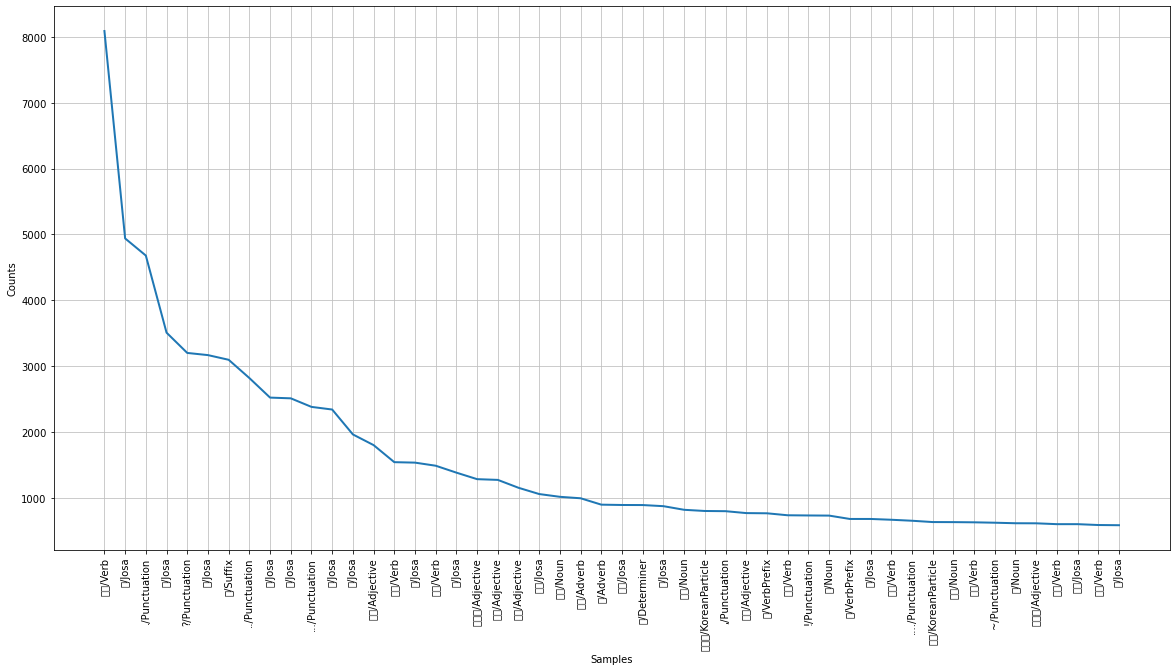

In [150]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
disgust_text.plot(50)

In [151]:
DISGUST_FREQUENCY_COUNT = 3000;
disgust_selected_words = [f[0] for f in disgust_text.vocab().most_common(DISGUST_FREQUENCY_COUNT)]

In [152]:
def disgust_term_frequency(doc):
    return [doc.count(word) for word in disgust_selected_words]

In [153]:
x_disgust_train = [disgust_term_frequency(d) for d,_ in train_disgust_docs]
x_disgust_test = [disgust_term_frequency(d) for d,_ in test_disgust_docs]
y_disgust_train = [c for _,c in train_disgust_docs]
y_disgust_test = [c for _,c in test_disgust_docs]

In [154]:
import numpy as np
x_disgust_train = np.asarray(x_disgust_train).astype('float32')
x_disgust_test = np.asarray(x_disgust_test). astype('float32')

y_disgust_train = np.asarray(y_disgust_train).astype('float32')
y_disgust_test = np.asarray(y_disgust_test).astype('float32')

In [155]:
import tensorflow as tf
disgust_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(DISGUST_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [156]:
disgust_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [220]:
disgust_model.fit(x_disgust_train, y_disgust_train, epochs=500, batch_size=512)

Epoch 1/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 0.9993
Epoch 2/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 0.9990
Epoch 3/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 0.9993
Epoch 4/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0021 - binary_accuracy: 0.9991
Epoch 5/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0020 - binary_accuracy: 0.9991
Epoch 6/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9991
Epoch 7/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 0.9992
Epoch 8/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 0.9991
Epoch 9/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0019 - binary_accuracy: 0.9992
Epoch 10/500
53/53 [==========================

53/53 [==============================] - 0s 7ms/step - loss: 0.0016 - binary_accuracy: 0.9994
Epoch 78/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9994
Epoch 79/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0015 - binary_accuracy: 0.9993
Epoch 80/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0016 - binary_accuracy: 0.9991
Epoch 81/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0015 - binary_accuracy: 0.9991
Epoch 82/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0015 - binary_accuracy: 0.9994
Epoch 83/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0016 - binary_accuracy: 0.9993
Epoch 84/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0015 - binary_accuracy: 0.9993
Epoch 85/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0015 - binary_accuracy: 0.9992
Epoch 86/500
53/53 [==============================

53/53 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 0.9994
Epoch 154/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9992
Epoch 155/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0015 - binary_accuracy: 0.9993
Epoch 156/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0014 - binary_accuracy: 0.9992
Epoch 157/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 158/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 159/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0015 - binary_accuracy: 0.9993
Epoch 160/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 161/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 162/500
53/53 [=====================

Epoch 229/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 230/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 231/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 232/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9994
Epoch 233/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 234/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 235/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 236/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 237/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9994
Epoch 238/500
53/53 [=======

53/53 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 305/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 306/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 307/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 0.9993
Epoch 308/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 309/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 310/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 311/500
53/53 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 312/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 313/500
53/53 [=====================

53/53 [==============================] - 0s 8ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 380/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 381/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 382/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 383/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 384/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 385/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 386/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 387/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 388/500
53/53 [=====================

53/53 [==============================] - 0s 8ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 455/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0012 - binary_accuracy: 0.9994
Epoch 456/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9993
Epoch 457/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0012 - binary_accuracy: 0.9993
Epoch 458/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 459/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0012 - binary_accuracy: 0.9994
Epoch 460/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 461/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0012 - binary_accuracy: 0.9994
Epoch 462/500
53/53 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 0.9994
Epoch 463/500
53/53 [=====================

In [221]:
disgust_results = neutral_model.evaluate(x_disgust_test, y_disgust_test)

362/362 [==============================] - 0s 1ms/step - loss: 9.7643 - binary_accuracy: 0.7634


In [222]:
disgust_results

[9.764328002929688, 0.763410210609436]

In [223]:
disgust_model.save('disgust_model.h5')

In [224]:
disgust_review = "너무 화난다"
disgust_token = tokenize(disgust_review)
disgust_token

['너무/Adverb', '화나다/Verb']

In [225]:
tf = disgust_term_frequency(disgust_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(disgust_model.predict(data))

9.329396561952308e-06

In [226]:
def disgust_predict(predict):
    disgust_token = tokenize(predict)
    disgust_tfq = disgust_term_frequency(disgust_token)
    disgust_data = np.expand_dims(np.asarray(disgust_tfq).astype('float32'), axis=0)
    disgust_score = float(disgust_model.predict(disgust_data))
    print(f"혐오 ({round(disgust_score*100)}%)")
    disgust = round(disgust_score*100)

In [227]:
disgust_predict("")

혐오 (11%)


In [228]:
import matplotlib.pyplot as plt
def predict(predict):
    fear_predict(predict)
    disgust_predict(predict)
    sadness_predict(predict)
    happy_predict(predict)
    anger_predict(predict)
    neutral_predict(predict)
    surprise_predict(predict)
    #x = np.arange(7)
    #감정 = ['fear','disgust','sadness','happy','anger','neutral','surprise']
    #정확도 = [fear, disgust, sadness, happy, anger, neutral, surprise]
    #plt.bar(x,정확도)
    #plt.xticks(x,감정)
    #plt.show()

In [323]:
predict("허승락")

공포 (16%)
혐오 (11%)
슬픔 (17%)
행복 (17%)
분노 (9%)
중립 (26%)
놀람 (22%)
